In [2]:
import numpy as np
import pandas as pd

In [3]:
np.random.seed(42)
num_assets = 5  # Number of assets
num_days = 100  # Number of trading days

In [4]:

returns = np.random.normal(loc=0.005, scale=0.02, size=(num_days, num_assets))

volumes = np.random.randint(1000, 10000, size=(num_days, num_assets))

In [5]:
columns = [f"Asset_{i+1}" for i in range(num_assets)]
financial_data = pd.DataFrame(returns, columns=columns)
financial_data['Date'] = pd.date_range(start="2023-01-01", periods=num_days)
financial_data.set_index('Date', inplace=True)


In [6]:

for i, col in enumerate(columns):
    financial_data[f"{col}_Volume"] = volumes[:, i]

print(financial_data.head())

             Asset_1   Asset_2   Asset_3   Asset_4   Asset_5  Asset_1_Volume  \
Date                                                                           
2023-01-01  0.014934  0.002235  0.017954  0.035461  0.000317            6401   
2023-01-02  0.000317  0.036584  0.020349 -0.004389  0.015851            2733   
2023-01-03 -0.004268 -0.004315  0.009839 -0.033266 -0.029498            4517   
2023-01-04 -0.006246 -0.015257  0.011285 -0.013160 -0.023246            5324   
2023-01-05  0.034313  0.000484  0.006351 -0.023495 -0.005888            9195   

            Asset_2_Volume  Asset_3_Volume  Asset_4_Volume  Asset_5_Volume  
Date                                                                        
2023-01-01            2761            1876            4812            2460  
2023-01-02            2605            6622            7767            7986  
2023-01-03            4735            9434            3590            2063  
2023-01-04            6342            1005            

In [7]:

sample_with_replacement = financial_data.sample(n=10, replace=True)

sample_without_replacement = financial_data.sample(n=10, replace=False)

print("Sample with Replacement:")
print(sample_with_replacement.head())

print("\nSample without Replacement:")
print(sample_without_replacement.head())


Sample with Replacement:
             Asset_1   Asset_2   Asset_3   Asset_4   Asset_5  Asset_1_Volume  \
Date                                                                           
2023-02-04 -0.012790 -0.011316  0.003458  0.011823  0.010534            6031   
2023-02-19 -0.001690 -0.004499 -0.008067  0.040309  0.013100            7722   
2023-03-23  0.017457 -0.016352  0.002152  0.007406  0.015289            8124   
2023-03-03  0.007347  0.030553 -0.006831  0.015942  0.000956            1074   
2023-01-17  0.000607  0.012142  0.034558 -0.005365 -0.011170            2065   

            Asset_2_Volume  Asset_3_Volume  Asset_4_Volume  Asset_5_Volume  
Date                                                                        
2023-02-04            3708            8112            9393            4507  
2023-02-19            8218            8776            4675            4054  
2023-03-23            4157            1390            5430            9820  
2023-03-03            7981   

In [8]:
sample_with_replacement.describe()

,Asset_1,Asset_2,Asset_3,Asset_4,Asset_5,Asset_1_Volume,Asset_2_Volume,Asset_3_Volume,Asset_4_Volume,Asset_5_Volume
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.000411,0.012199,0.001640,-0.004219,0.007794,5792.600000,5587.500000,6449.600000,5226.700000,6989.600000
std,0.008912,0.022182,0.016496,0.022944,0.018128,3167.826111,1974.123842,2363.059279,2877.612631,2607.095498
min,-0.012790,-0.016352,-0.022602,-0.033266,-0.029498,1074.000000,3136.000000,1390.000000,1920.000000,2063.000000
25%,-0.004505,-0.004453,-0.007758,-0.018900,0.001689,2678.000000,4209.750000,5197.750000,2994.500000,5063.250000
50%,-0.000542,0.006715,0.002805,-0.008796,0.011817,6876.500000,4632.500000,6471.500000,4155.000000,7874.500000
75%,0.006072,0.033587,0.009016,0.010719,0.017420,8178.000000,7580.500000,8069.750000,7960.500000,9012.500000
max,0.017457,0.042315,0.034558,0.040309,0.035462,9567.000000,8218.000000,9434.000000,9393.000000,9820.000000


In [9]:
from scipy.stats import ttest_ind

# Perform t-test on returns of Asset_1 and Asset_2
t_stat, p_value = ttest_ind(financial_data['Asset_1'], financial_data['Asset_2'])

print(f"t-Statistic: {t_stat:.4f}, p-Value: {p_value:.4f}")

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: The mean returns of Asset_1 and Asset_2 are significantly different.")
else:
    print("Fail to reject the null hypothesis: No significant difference in mean returns of Asset_1 and Asset_2.")


t-Statistic: -0.9124, p-Value: 0.3627
Fail to reject the null hypothesis: No significant difference in mean returns of Asset_1 and Asset_2.


In [10]:
from scipy.stats import chi2_contingency

# Create contingency table for volumes
contingency_table = pd.crosstab(
    pd.cut(financial_data['Asset_1_Volume'], bins=3, labels=["Low", "Medium", "High"]),
    pd.cut(financial_data['Asset_2_Volume'], bins=3, labels=["Low", "Medium", "High"])
)

# Perform chi-squared test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Squared Statistic: {chi2_stat:.4f}, p-Value: {p_value:.4f}, Degrees of Freedom: {dof}")

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: The trading volumes of Asset_1 and Asset_2 are not independent.")
else:
    print("Fail to reject the null hypothesis: The trading volumes of Asset_1 and Asset_2 are independent.")


Chi-Squared Statistic: 1.0109, p-Value: 0.9081, Degrees of Freedom: 4
Fail to reject the null hypothesis: The trading volumes of Asset_1 and Asset_2 are independent.


In [13]:
contingency_table

Asset_2_Volume,Low,Medium,High
Asset_1_Volume,,,
Low,13,14,11
Medium,8,8,9
High,14,14,9


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

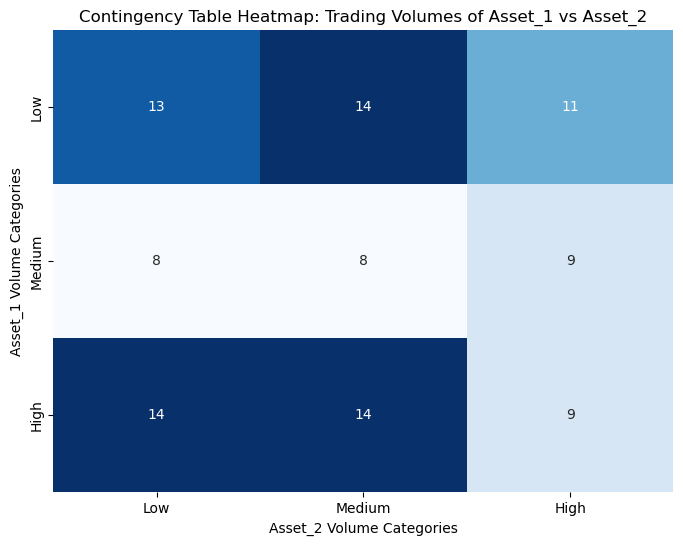

In [23]:
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Contingency Table Heatmap: Trading Volumes of Asset_1 vs Asset_2")
plt.xlabel("Asset_2 Volume Categories")
plt.ylabel("Asset_1 Volume Categories")
plt.show()

